# Введение

В этой лекции мы рассмотрим следующие темы:

- Определение данных временных рядов.
- Введение в анализ временных рядов и примеры применения.
- Основные компоненты временных рядов.
- Декомпозиция временных рядов.
 

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from scipy.fft import fft
np.random.seed(0)  # for reproducibility

---

## Basics

### Что такое временной ряд?

- Временной ряд - это последовательность точек данных, организованных во временном порядке.
- Обычно временной сигнал выбирается в равноотстоящие друг от друга точки времени.
- Их можно представить как последовательность выбираемых значений.

<img src="data\l1\ts_equal.png" style="width: 50%; display: block; margin: auto;">

- Нерегулярно дискретизированные временные сигналы все еще могут быть представлены как временной ряд.
- Необходимо закодировать эту дополнительную информацию в дополнительную структуру данных.

<img src="data\l1\ts_unequal.png" style="width: 50%; display: block; margin: auto;">

### Какие данные представлены в виде временных рядов?

- Временные ряды встречаются во множестве природных явлений, промышленных и инженерных приложений, бизнеса, человеческой деятельности и т. д.

<img src="data\l1\passengers.png" style="width: 70%; display: block; margin: auto;">

<img src="data\l1\co2.png" style="width: 70%; display: block; margin: auto;">

<img src="data\l1\sunspots.png" style="width: 70%; display: block; margin: auto;">

<img src="data\l1\electricity.png" style="width: 70%; display: block; margin: auto;">

<img src="data\l1\water_temps.png" style="width: 70%; display: block; margin: auto;">

- Другие примеры включают данные из:
    - Финансы: цены акций, цены активов, макроэкономические факторы.
    - Электронная коммерция: просмотры страниц, новые пользователи, поиски.
    - Бизнес: транзакции, выручка, уровни запасов.
    - Естественный язык: машинный перевод, чат-боты.

### Анализ временных рядов

Основные цели анализа временных рядов:
1. **Понять** и охарактеризовать базовый процесс, который генерирует наблюдаемые данные.
2. **Прогнозировать** эволюцию процесса, т. е. предсказать следующие наблюдаемые значения.

- Существует две основные различные точки зрения на временной ряд.
- Каждая точка зрения приводит к различным подходам к анализу временного ряда

#### Статистическая перспектива

- Временной ряд — это последовательность *случайных величин*, между которыми существует некоторая корреляция или иное распределительное отношение.
- Последовательность — это реализация (наблюдаемые значения) стохастического процесса.
- Статистические подходы к временным рядам фокусируются на поиске параметров стохастического процесса, которые с наибольшей вероятностью создали наблюдаемый временной ряд.

<img src="data\l1\random_var.png" style="width: 30%; display: block; margin: auto;">

#### Перспектива динамической системы

- Эта перспектива предполагает, что существует система, управляемая неизвестными переменными $\{x_1, x_2, x_3, \dots ,x_𝑁\}$.
- Обычно мы наблюдаем только один временной ряд $y$, генерируемый системой.
- Чем может быть $y$?
- Одной из системных переменных.
- Функция $f$ системных переменных.
- Цель анализа - реконструировать динамику всей системы из $y$.

<img src="data\l1\partial.png" style="width: 30%; display: block; margin: auto;">

### Приложения

Анализ временных рядов применяется во многих реальных приложениях, включая
- Экономическое прогнозирование
- Анализ фондового рынка
- Планирование и прогнозирование спроса
- Обнаружение аномалий
- … И многое другое

**Экономическое прогнозирование**

- Анализ временных рядов используется в макроэкономических прогнозах.
- Всемирная торговая организация занимается прогнозированием временных рядов для прогнозирования уровней международной торговли [[источник](https://www.econ-jobs.com/research/36056-Forecasting-international-trade-A-time-series-approach.pdf)].
- Федеральная резервная система использует прогнозы временных рядов экономики для установления процентных ставок [[источник](https://www.federalreserve.gov/pubs/feds/2009/200910/200910pap.pdf)].



**Прогнозирование спроса**

- Анализ временных рядов используется для прогнозирования спроса на разных уровнях детализации.
- Amazon и другие компании электронной коммерции используют моделирование временных рядов для прогнозирования спроса на уровне географии продукта [[источник](https://www.theverge.com/2014/1/18/5320636/amazon-plans-to-ship-your-packages-before-you-even-buy-them)].
- Помогает удовлетворить потребности клиентов (быстрая доставка) и сократить отходы запасов


**Обнаружение аномалий**

- Используется для обнаружения аномального поведения в базовой системе путем изучения необычных закономерностей во временном ряду.
- Широко используется в производстве для обнаружения дефектов и целевого профилактического обслуживания [[источник](https://papers.phmsociety.org/index.php/phme/article/view/1256/phmec_20_1256)].
- С новыми устройствами IoT обнаружение аномалий используется в машиностроении тяжелой промышленности, такой как нефтяная и газовая [[источник](https://arxiv.org/abs/1607.02480)].

---

## Компоненты временного ряда

- Часто предполагается, что временной ряд состоит из трех компонентов:
    - *Тренд* *Trend*: долгосрочное направление.
    - *Сезонность* *Seasonality*: периодическое поведение.
    - *Остатки* *Residuals*: нерегулярные колебания.

### Тренд

- Тренд отражает общее направление временного ряда.
- Например, увеличение количества пассажиров с годами, несмотря на сезонные колебания.
- Тренд может быть возрастающей, убывающей или постоянной.
- Он может увеличиваться/уменьшаться по-разному с течением времени (линейно, экспоненциально и т. д.).

<img src="data\l1\passengers_trend.png" style="width: 70%; display: block; margin: auto;">

- Давайте создадим тренд с нуля, чтобы понять, как он выглядит.

In [2]:
time = np.arange(144)
trend = time * 2.65 +100

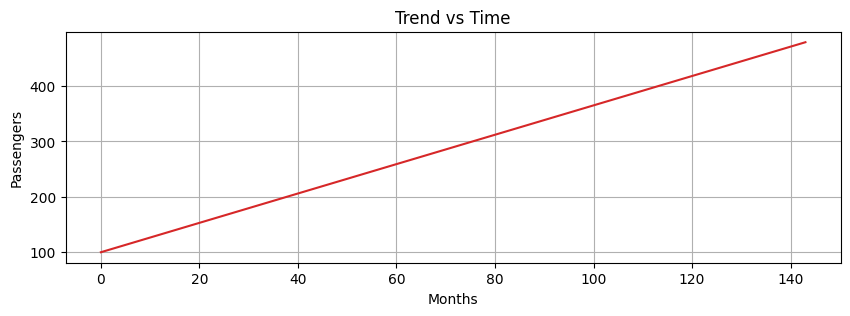

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, trend, color='tab:red')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Trend vs Time");

### Сезонность

- Периодические колебания в данных временных рядов, которые происходят через регулярные интервалы из-за сезонных факторов.
- Характеризуется последовательными и предсказуемыми закономерностями в течение определенного периода (например, ежедневно, ежемесячно, ежеквартально, ежегодно).

Это может быть обусловлено многими факторами.
- Естественные события, такие как колебания погоды, вызванные временем года.
- Деловые или административные процедуры, такие как начало и конец учебного года.
- Социальное или культурное поведение, например, праздники или религиозные обряды.

- Давайте сгенерируем сезонную составляющую.

In [4]:
seasonal = 20 + np.sin( time * 0.5) * 20

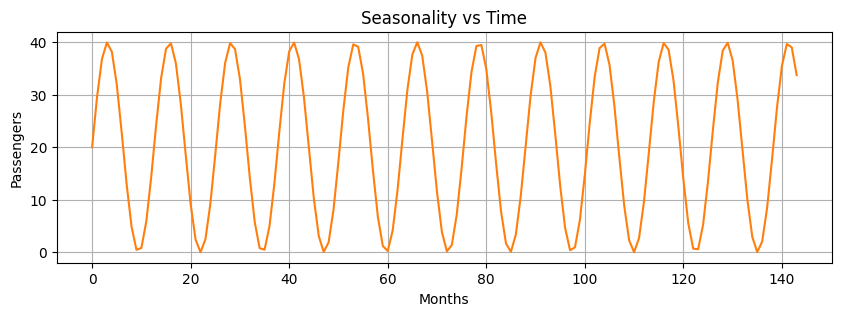

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, seasonal, color='tab:orange')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Seasonality vs Time");

### Остатки

- Остатки — это случайные колебания, оставшиеся после удаления тренда и сезонности из исходного временного ряда.
- В остатках не должно быть тренда или сезонной закономерности.
- Они представляют собой краткосрочные, довольно непредсказуемые колебания.

In [6]:
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

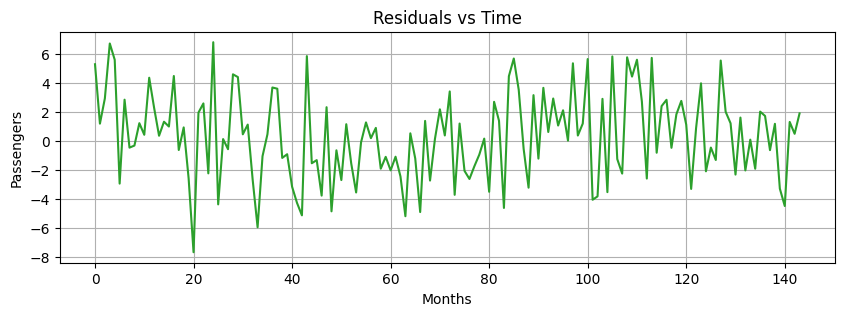

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, residuals, color='tab:green')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Residuals vs Time");

---

## Модели декомпозиции

- Компоненты временного ряда можно разложить с помощью следующих моделей:
    1. Аддитивное разложение
    2. Мультипликативное разложение
    3. Псевдоаддитивное разложение

### Аддитивная модель

- Аддитивные модели предполагают, что наблюдаемый временной ряд является суммой своих компонентов:

$$X(t) = T(t) + S(t) + R(t)$$

- где
    - $X(t)$ - временной ряд
    - $T(t)$ - тренд
    - $S(t)$ - сезонность
    - $R(t)$ - остаток
- Аддитивные модели используются, когда величины сезонных и остаточных значений не зависят от уровня тренда.

In [8]:
additive = trend + seasonal + residuals

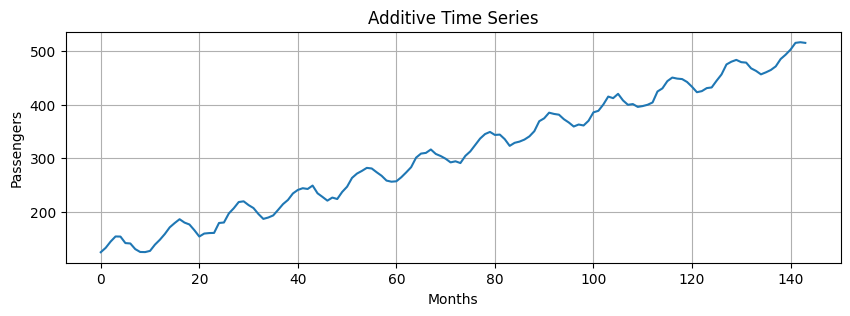

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, additive, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Additive Time Series")
plt.grid();

### Мультипликативная модель

- Предполагает, что наблюдаемый временной ряд является произведением своих компонентов:

$$X(t) = T(t) \cdot S(t) \cdot R(t)$$

- Мультипликативную модель можно преобразовать в аддитивную, применив логарифмическое преобразование:

$$\log \left( T(t) \cdot S(t) \cdot R(t) \right) = \log(T(t)) + \log(S(t)) + \log(R(t))$$

- Мультипликативные модели используются, когда величины сезонных и остаточных значений зависят от тренда.

In [10]:
multiplicative = trend * seasonal # мы не включаем остатки, чтобы сделать картину более ясной

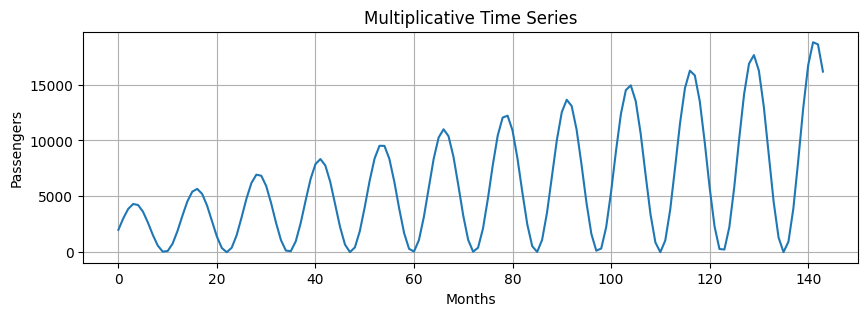

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, multiplicative, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Multiplicative Time Series")
plt.grid();

### Псевдоаддитивная модель

- Псевдоаддитивные модели объединяют элементы аддитивной и мультипликативной моделей.
- Полезно, когда:
- Значения временных рядов близки или равны нулю. Мультипликативные модели плохо справляются с нулевыми значениями, но вам все равно нужно моделировать мультипликативную сезонность.
- Некоторые признаки являются мультипликативными (например, сезонные эффекты), а другие — аддитивными (например, остатки).
- Сложные сезонные закономерности или данные, которые не полностью соответствуют аддитивной или мультипликативной модели.

- Например, эта модель особенно актуальна для моделирования рядов, которые:
- крайне зависимы от погоды,
- имеют резко выраженные сезонные колебания и тренд-циклические движения.
- Формулировка:

$$X(t) = T(t) + T(t)\cdot(S(t) - 1) + T(t)\cdot(R(t) - 1) = T(t)\cdot(S(t) + R(t) -1)$$

In [12]:
pseudoadditive = trend * (seasonal + residuals - 1)

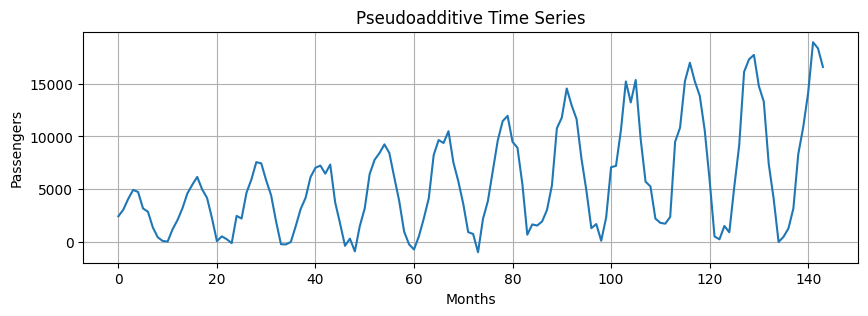

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, pseudoadditive, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Pseudoadditive Time Series")
plt.grid();

---

## Разложение временного ряда

- Теперь давайте изменим направления.
- У нас есть аддитивные и мультипликативные данные.
- Давайте разложим их на три компонента.

- Очень простой, но часто полезный подход - оценить *линейный* тренд.
- *Детрендированный* временной ряд получается путем вычитания линейного тренда из данных.
- Линейный тренд вычисляется как полином 1-го порядка.

In [14]:
slope, intercept = np.polyfit(np.arange(len(additive)), additive, 1) # estimate line coefficient
trend = np.arange(len(additive)) * slope + intercept # linear trend
detrended = additive - trend # remove the trend

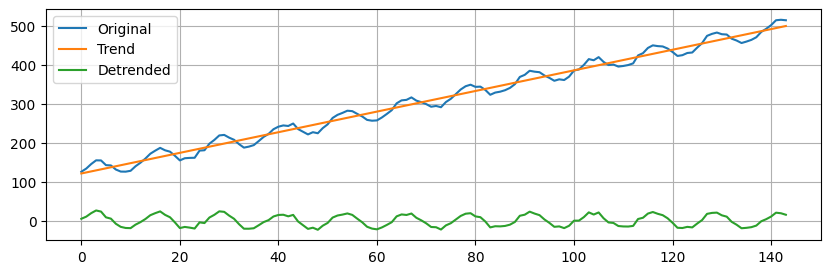

In [15]:
plt.figure(figsize=(10, 3))
plt.plot(additive, label='Original')
plt.plot(trend, label='Trend')
plt.plot(detrended, label='Detrended')
plt.grid()
plt.legend();

- Далее мы будем использовать `seasonal_decompose` (подробнее [здесь](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)) для выделения основных компонентов временного ряда.
- Это простой метод, который требует от нас указания типа модели (аддитивная или мультипликативная) и основного периода.

### Аддитивная декомпозиция

- Нам нужно указать целое число, представляющее основную сезонность данных.
- Рассматривая сезонную составляющую, мы видим, что период составляет *приблизительно* $12$ временных шагов.
- Поэтому мы устанавливаем `period=12`.

In [16]:
additive_decomposition = seasonal_decompose(x=additive, model='additive', period=12)

In [17]:
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()

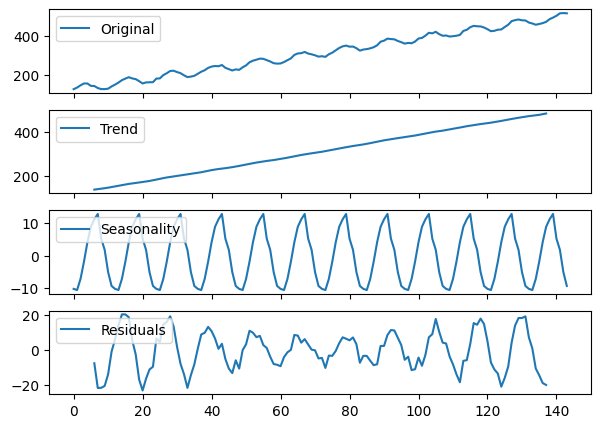

In [18]:
seas_decomp_plots(additive, additive_decomposition)

- Синяя линия на каждом графике представляет собой разложение.
- В верхнем левом углу каждого графика есть легенда, сообщающая вам, что представляет собой каждый график.
- Вы можете видеть, что разложение не идеально с точки зрения сезонности и остатков, но оно довольно близко.

- Вы можете заметить, что и *тренд*, и *остатки* не содержат данных в начале и конце.
- Это связано с тем, как рассчитывается тренд (это выходит за рамки этого урока).
- Остатки отсутствуют просто потому, что $R_{t} = Y_{t} - T_{t} - S_{t}$, поэтому отсутствующие значения тренда означают также и отсутствие остаточных значений.
- Другими словами, с этими графиками все в порядке.

### Мультипликативная декомпозиция

- Мы используем ту же функцию, что и раньше, но для `мультипликативного` временного ряда.
- Поскольку мы знаем, что это мультипликативный временной ряд, мы объявляем `model='multiplicative'` в `seasonal_decompose`.

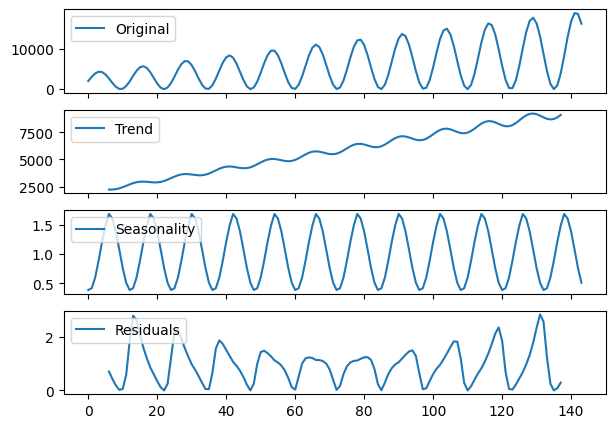

In [19]:
multiplicative_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=12)
seas_decomp_plots(multiplicative, multiplicative_decomposition)

- Опять же, разложение относительно хорошо улавливает общую тенденцию и сезонность.
- Мы видим, что формы следуют ожидаемым нами закономерностям.

### Locally estimated scatterplot smoothing (LOESS) - Сглаживание локально оцененной диаграммы рассеяния
- Далее мы пробуем второй метод, называемый `STL` (сезонная и трендовая декомпозиция с использованием LOESS).
- Начнем с аддитивной модели.

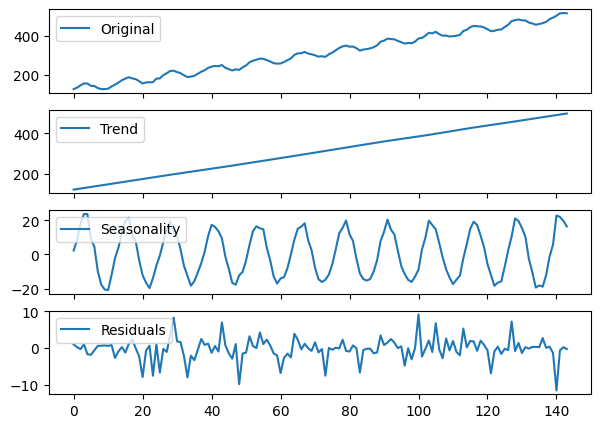

In [20]:
stl_decomposition = STL(endog=additive, period=12, robust=True).fit()
seas_decomp_plots(additive, stl_decomposition)

- Разложение STL очень хорошо работает с `аддитивным` временным рядом.
- Далее мы пробуем с `мультипликативным`.

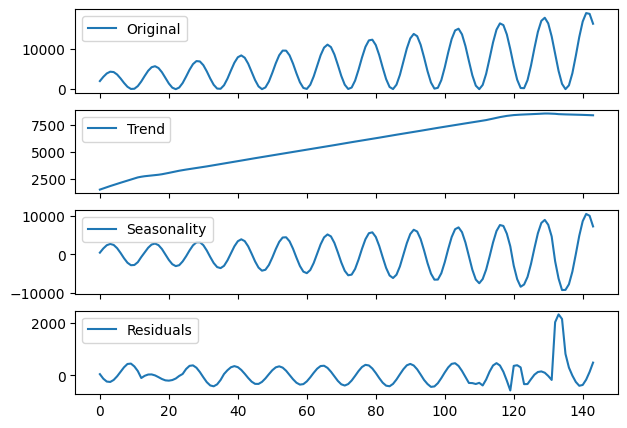

In [21]:
stl_decomposition = STL(endog=multiplicative, period=12, robust=True).fit()
seas_decomp_plots(multiplicative, stl_decomposition)

- Это разложение не так хорошо, как предыдущее.

### Какой метод использовать?

Используйте ``seasonal_decompose``, когда:

- Данные вашего временного ряда имеют четкую и стабильную сезонную закономерность и тенденцию.
- Вы предпочитаете более простую модель с меньшим количеством параметров для настройки.
- Сезонная амплитуда постоянна во времени (что предполагает аддитивную модель) или изменяется пропорционально тенденции (что предполагает мультипликативную модель).

Используйте ``STL``, когда:

- Ваш временной ряд демонстрирует сложную сезонность, которая может меняться со временем.
- Вам необходимо эффективно обрабатывать выбросы, не искажая тренд и сезонные компоненты.
- Вы имеете дело с нелинейными трендами и сезонностью, и вам нужно больше контроля над процессом декомпозиции.

---

## Определите доминирующий период/частоту

- ``seasonal_decompose`` ожидает доминирующий период в качестве параметра.
- В этом примере мы вручную сгенерировали компонент ``seasonal`` следующим образом:

````python
seasonal = 20 + np.sin( time * 0.5) * 20
````

- Мы сказали, что период был *приблизительно* $12$.
- Но, в общем, как нам это узнать 🤔?

- Вы можете использовать один из следующих методов:
- Постройте график данных и попытайтесь выяснить, через сколько шагов цикл повторяется.
- Постройте график автокорреляции (подробнее об этом позже).
- Используйте быстрое преобразование Фурье (Fast Fourier Transform) для сигнала *без* тренда.

- Мы рассмотрим БПФ (FFT) подробнее позже.
- На данный момент вы можете использовать следующую функцию для вычисления доминирующего периода в данных.

In [22]:
def fft_analysis(signal):

    # Linear detrending
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept
    detrended = signal - trend

    fft_values = fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))

    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]

    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    print(f"Dominant Frequency: {dominant_frequency:.3f}")

    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    print(f"Dominant Period: {dominant_period:.2f} time units")

    return dominant_period, positive_frequencies, magnitudes

In [23]:
period, freqs, magnitudes = fft_analysis(seasonal)

Dominant Frequency: 0.076
Dominant Period: 13.09 time units


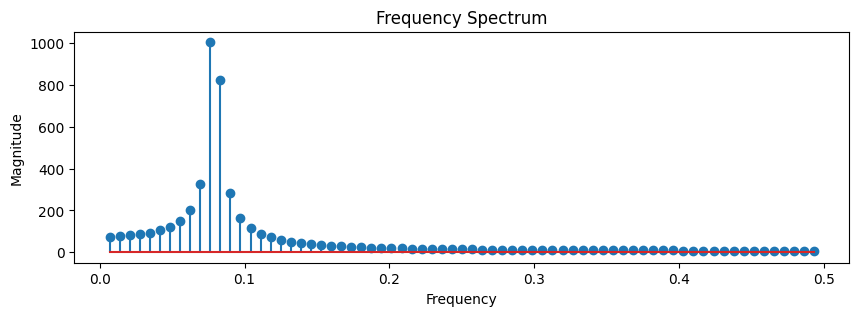

In [24]:
# Plotting the spectrum
plt.figure(figsize=(10, 3))
plt.stem(freqs, magnitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

- Оказывается, основная сезонность была не совсем $12$.
- Если мы хотим сгенерировать периодический сигнал с сезонностью $12$, нам нужно сделать следующее.

In [25]:
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20

In [26]:
fft_analysis(seasonal_12);

Dominant Frequency: 0.083
Dominant Period: 12.00 time units



---

## Резюме

В этой лекции мы рассмотрели следующие темы.

- Определение временного ряда и примеры временных рядов из реального мира.
- Определение анализа временных рядов и примеры его применения в различных областях.
- Практическое понимание трех компонентов данных временных рядов.
- Аддитивные, мультипликативные и псевдоаддитивные модели.
- Стандартные подходы к разложению временного ряда на его составные части.

## Упражнения


### Упражнение 1

- Рассмотрим в качестве сезонной составляющей периодический сигнал с периодом 12
```python
time = np.arange(144)
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20
```
- Используйте `seasonal_12` и компоненты `trend` и `residual` ниже, чтобы определить и построить аддитивную и мультипликативную модели
```python
trend = time * 2.65 + 100
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))
```
- Выполните сезонную декомпозицию с `seasonal_decompose` и `STL` для новых сигналов и сравните результаты с полученными в классе, где мы использовали приблизительный период.

In [27]:
time = np.arange(144)
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20

trend = time * 2.65 + 100
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

In [28]:
additive = trend + seasonal_12 + residuals
multiplicative = trend * seasonal_12

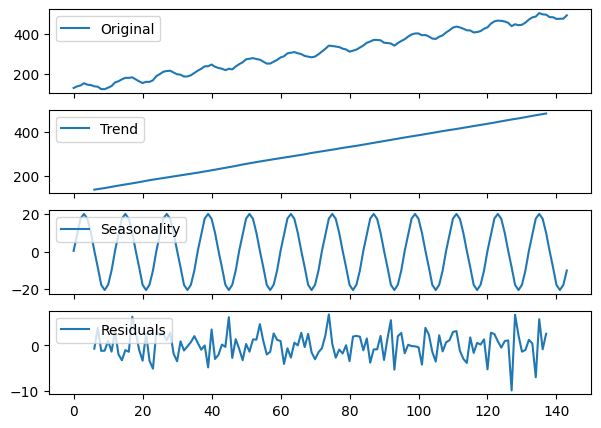

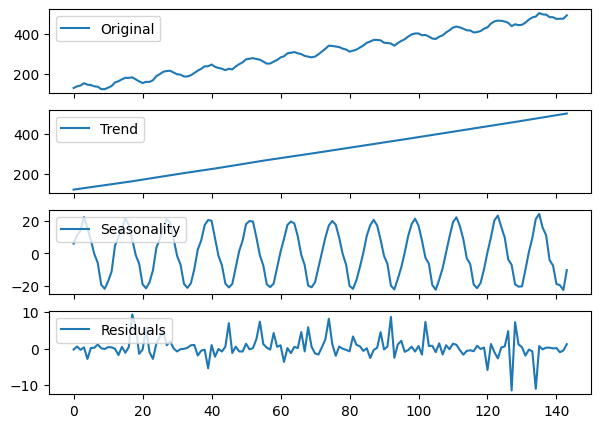

In [29]:
additive_decomposition = seasonal_decompose(x=additive, model='additive', period=12)
seas_decomp_plots(additive, additive_decomposition)
stl_decomposition = STL(endog=additive, period=12, robust=True).fit()
seas_decomp_plots(additive, stl_decomposition)

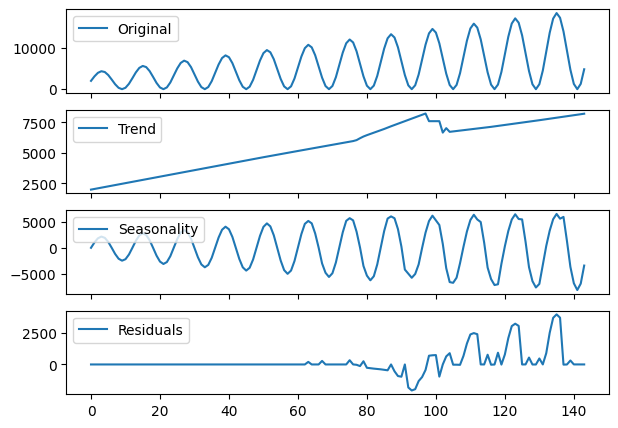

In [30]:
# multiplicative_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=12)
# seas_decomp_plots(multiplicative, multiplicative_decomposition)
stl_decomposition = STL(endog=multiplicative, period=12, robust=True).fit()
seas_decomp_plots(multiplicative, stl_decomposition)

seasonal_decompose лучше справилась с аддитивными данными, но упадла с ошибкой на мультипликативных из-за наличия 0 в выборке. STL оказалась не столь точна с аддитивными данными, зато смогла относительно корректно на участке от 0 до 60 определять компоненты   
Когда вычисления были с неправильным периодом сезонности, а остатках были сильно выражены сезонные компоненты, которых практически нет сейчас

### Упражнение 2
Загрузите два разных временных ряда следующим образом.
```python
import statsmodels.api as sm
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values
print(len(ts_A))
ts_B = sm.datasets.get_rdataset("co2", "datasets").data["value"].values
print(len(ts_B))
```
- Постройте график двух временных рядов.
- Определите, выглядит ли временной ряд аддитивной или мультипликативной моделью.
- Определите основной период сезонной составляющей в двух временных рядах.


In [ ]:
import statsmodels.api as sm
import pandas as pd
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values
print(len(ts_A))
# ts_B = sm.datasets.get_rdataset("co2", "datasets").data["value"].values
# Пришлось заменить датасет на другой, потому что при попытке загрузить оригинальный возникает ошибка
co2_data = sm.datasets.co2.load_pandas()
ts_B = co2_data.data['co2'].values 
# Создаем копию массива для заполнения пропусков
ts_B_filled = ts_B.copy()

# Находим индексы пропущенных значений
missing_indices = np.where(np.isnan(ts_B))[0]

# Заполняем каждый пропуск средним между соседними значениями
for idx in missing_indices:
    # Ищем ближайшее значение слева
    left_val = None
    left_idx = idx - 1
    while left_idx >= 0:
        if not np.isnan(ts_B[left_idx]):
            left_val = ts_B[left_idx]
            break
        left_idx -= 1
    
    # Ищем ближайшее значение справа
    right_val = None
    right_idx = idx + 1
    while right_idx < len(ts_B):
        if not np.isnan(ts_B[right_idx]):
            right_val = ts_B[right_idx]
            break
        right_idx += 1
    
    # Если оба значения найдены, вычисляем среднее
    if left_val is not None and right_val is not None:
        ts_B_filled[idx] = (left_val + right_val) / 2
    # Если найдено только значение слева, используем его
    elif left_val is not None:
        ts_B_filled[idx] = left_val
    # Если найдено только значение справа, используем его
    elif right_val is not None:
        ts_B_filled[idx] = right_val
    # Если оба значения не найдены, оставляем пропуск как есть
    else:
        pass

# Проверяем результат
print(f"Количество пропусков до обработки: {np.sum(np.isnan(ts_B))}")
print(f"Количество пропусков после обработки: {np.sum(np.isnan(ts_B_filled))}")
ts_B = ts_B_filled
print(len(ts_B))

144
Количество пропусков до обработки: 59
Количество пропусков после обработки: 0
2284


In [46]:
ts_B

array([316.1, 317.3, 317.6, ..., 371.2, 371.3, 371.5])

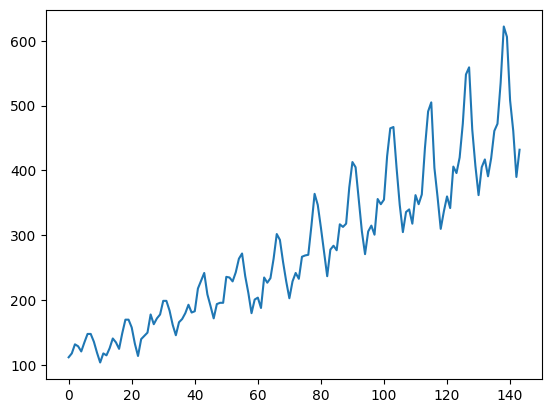

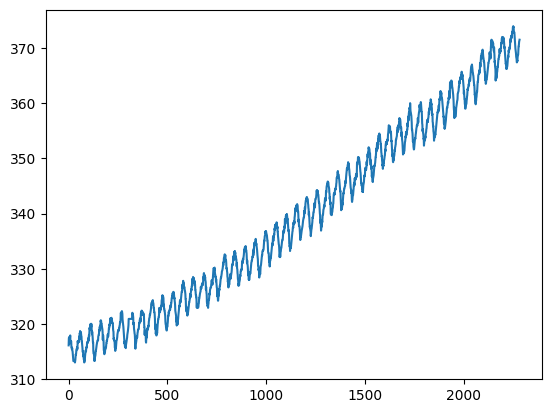

In [47]:
plt.plot(ts_A)
plt.show()
plt.plot(ts_B)
plt.show()

Первый ряд выглядит как смесь аддитивного и мультипликативного, поскольку заметен возрастающий тренд, а увеличивающаяся амплитуда говорит о наличии мультипликативной компоненты.  
Второй ряд похож на полностью аддитивный  

In [48]:
period, freqs, magnitudes = fft_analysis(ts_A)

Dominant Frequency: 0.083
Dominant Period: 12.00 time units


In [49]:
period, freqs, magnitudes = fft_analysis(ts_B)

Dominant Frequency: 0.019
Dominant Period: 51.91 time units


В первом ряду основной период составляет 12, во втором 52

### Упражнение 3
- Разложите `ts_A` и `ts_B` с помощью `seasonal_decompose` и `STL`.
- Прокомментируйте полученные результаты.
from statsmodels.tsa.seasonal import season_decompose, STL

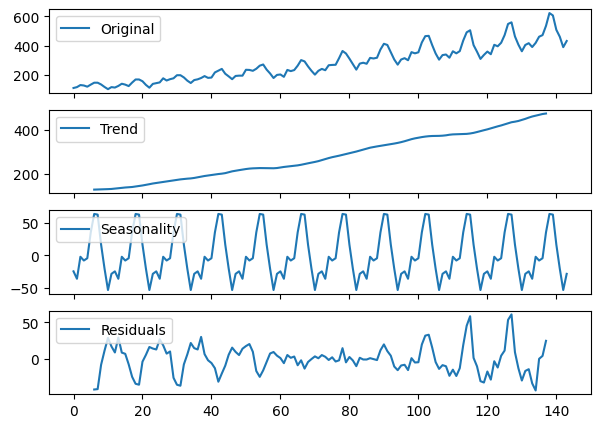

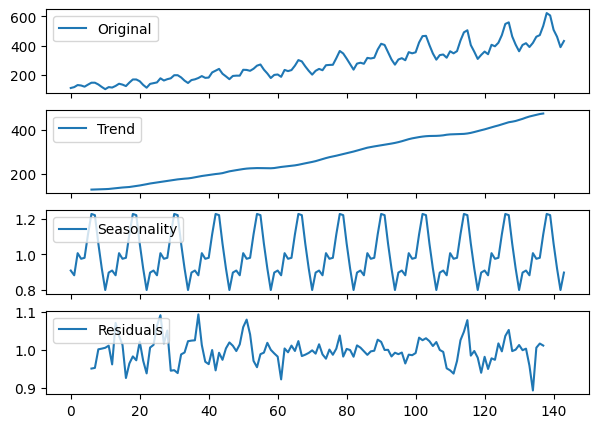

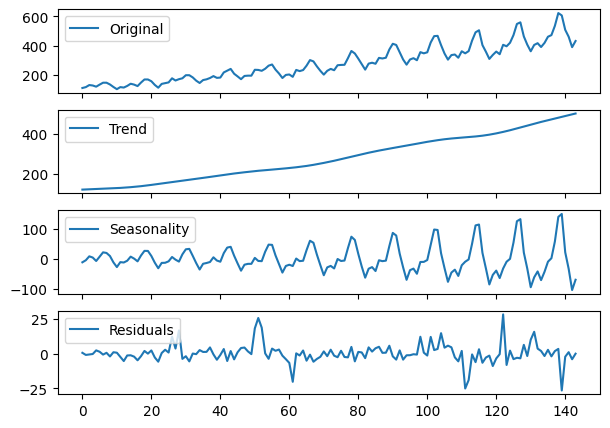

In [50]:
additive_decomposition = seasonal_decompose(x=ts_A, model='additive', period=12)
seas_decomp_plots(ts_A, additive_decomposition)
multiplicative_decomposition = seasonal_decompose(x=ts_A, model='multiplicative', period=12)
seas_decomp_plots(ts_A, multiplicative_decomposition)
stl_decomposition = STL(endog=ts_A, period=12, robust=True).fit()
seas_decomp_plots(ts_A, stl_decomposition)

Можно сделать вывод, что первый ряд оказался мультипликативным, и его хорошо описал seasonal_decompose(x=ts_A, model='multiplicative', period=12)  


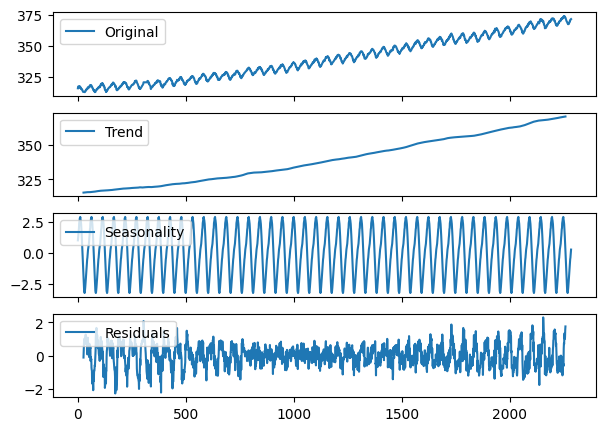

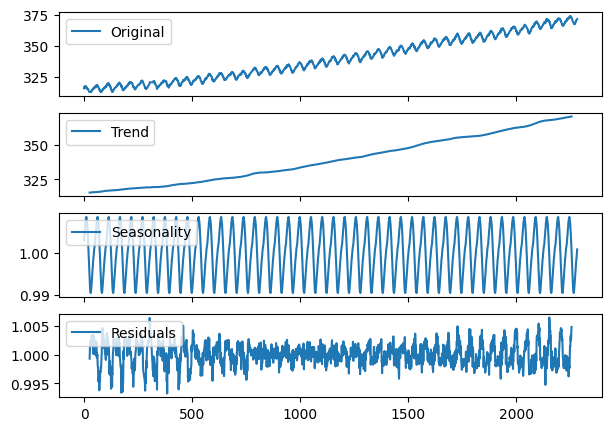

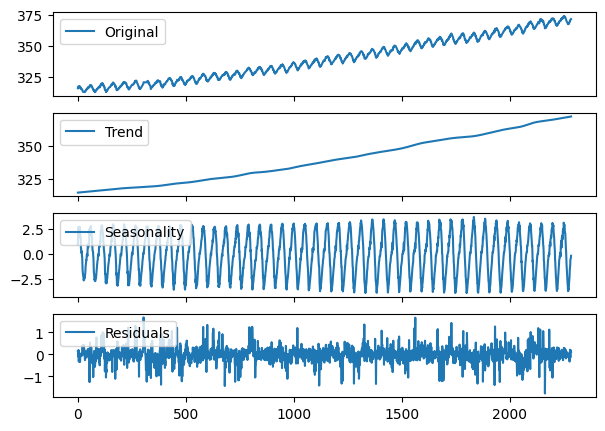

: 

In [ ]:
additive_decomposition = seasonal_decompose(x=ts_B, model='additive', period=52)
seas_decomp_plots(ts_B, additive_decomposition)
multiplicative_decomposition = seasonal_decompose(x=ts_B, model='multiplicative', period=52)
seas_decomp_plots(ts_B, multiplicative_decomposition)
stl_decomposition = STL(endog=ts_B, period=52, robust=True).fit()
seas_decomp_plots(ts_B, stl_decomposition)

Вторая модель аддитивная, и ее хорошо описывает stl_decomposition = STL(endog=ts_B, period=52, robust=True).fit(), поскольку рассчитанный шум является наименьшим при визуальной схожести остальных компонент